### MULTICLASS CLASSIFIACTION CODES
* 사용 FEATURE: 주중/주말, 시간대구분, 상업지역 면적, 평균생활인구수
* Y: 생활인구당 평균매출 군집 (0 - 하 , 1 - 중, 2 - 상)

In [1]:
## import module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## Load Data
mamm_feature = pd.read_csv("../../../resources/processedData/매머드_feature_clustered_y.csv", index_col =False)

In [2]:
mamm_feature

,매장코드_영업일자_시간대,주중/주말,시간대구분,상업지역 면적,평균생활인구수,생활인구당 평균매출_cl
0,S53661_20190201_1,0,1.0,203448.20,102461.88,0
1,S53661_20190201_2,0,2.0,203448.20,149401.14,0
2,S53661_20190201_3,0,3.0,203448.20,130305.51,0
3,S53661_20190207_1,0,1.0,203448.20,94200.97,1
4,S53661_20190207_2,0,2.0,203448.20,144196.27,0
...,...,...,...,...,...,...
1425,T64222_20190227_4,0,4.0,103356.25,93636.11,0
1426,T64222_20190228_1,0,1.0,103356.25,100872.60,1
1427,T64222_20190228_2,0,2.0,103356.25,146583.15,2
1428,T64222_20190228_3,0,3.0,103356.25,138484.15,1


In [54]:
## Prepare the dataset
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 시간대구분, 주중/주말	원핫인코딩
X = mamm_feature.iloc[:,[1,2,3,4]]
y = mamm_feature["생활인구당 평균매출_cl"]

# split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

num_attributes = ["상업지역 면적", "평균생활인구수"]
cat_attributes = ["주중/주말",	"시간대구분"]

feature_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attributes),
    ("cat", OneHotEncoder(), cat_attributes),
])

feature_pipeline.fit(X_train)
X_train_transformed = feature_pipeline.transform(X_train)
X_test_transformed = feature_pipeline.transform(X_test)

In [33]:
## plotting을 위한 함수 
from sklearn.metrics import confusion_matrix

# confusion matrix plotting 함수
def plot_confusion_matrix(y_test, y_pred, algorithm_name):
    # 혼동행렬 시각화
    plt.figure(figsize =(60, 60))
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                     columns = ['하','중','상'],
                     index=['하','중','상'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix - '+algorithm_name)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

# roc curve plotting 함수
def plot_roc_curve(n_classes, y_test, y_pred, algorithm_name):
    # ROC & AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(15, 5))
    for idx, i in enumerate(range(n_classes)):
        plt.subplot(131+idx)
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Class %0.0f' % idx)
        plt.legend(loc="lower right")
    plt.show()

In [57]:
import matplotlib.pyplot as plt
from numpy import average
import seaborn as sns
import pandas as pd

# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## 모델 수행 코드
def model_execution(model, algorithm_name, x_train, y_train, x_test, y_test):

    # 모델 학습
    model.fit(x_train, y_train)
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # 다중 분류이기 때문에 평균으로 냄
    test_acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average= "macro")
    recall = recall_score(y_test, y_pred, average= "macro")
    f1 = f1_score(y_test, y_pred, average='micro')
    
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}") # 정확도
    print(f"Precision: {precision:.3f}") # 정밀도
    print(f"Recall: {recall:.3f}") # 재현율
    print(f"F1-score: {f1:.3f}") # F1 스코어
    
    # confusion-matrix plot
    plot_confusion_matrix(y_test, y_pred, algorithm_name)


Train Accuracy: 0.874
Test Accuracy: 0.804
Precision: 0.779
Recall: 0.769
F1-score: 0.804


<Figure size 4320x4320 with 0 Axes>

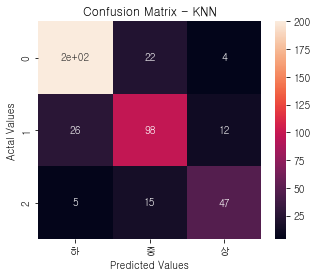

In [58]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
mamm_knn = KNeighborsClassifier(n_neighbors=3)
model_execution(mamm_knn, "KNN", X_train_transformed, y_train, X_test_transformed, y_test)

Train Accuracy: 0.993
Test Accuracy: 0.751
Precision: 0.711
Recall: 0.715
F1-score: 0.751


<Figure size 4320x4320 with 0 Axes>

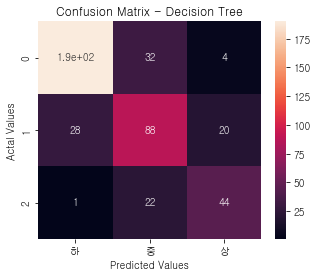

In [59]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
mamm_tree = DecisionTreeClassifier(criterion='entropy')
model_execution(mamm_tree, "Decision Tree", X_train_transformed, y_train, X_test_transformed, y_test)


Train Accuracy: 0.993
Test Accuracy: 0.788
Precision: 0.750
Recall: 0.751
F1-score: 0.788


<Figure size 4320x4320 with 0 Axes>

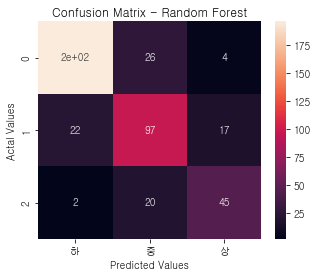

In [60]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
mamm_rf = RandomForestClassifier(criterion='entropy')
model_execution(mamm_rf, "Random Forest", X_train_transformed, y_train, X_test_transformed, y_test)

Train Accuracy: 0.832
Test Accuracy: 0.811
Precision: 0.772
Recall: 0.749
F1-score: 0.811


<Figure size 4320x4320 with 0 Axes>

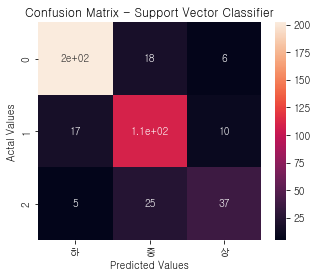

In [65]:
## Support Vector Classifier
from sklearn import svm
mamm_svc = svm.SVC(kernel='rbf', gamma=6, C=4.5)
model_execution(mamm_svc, "Support Vector Classifier", X_train_transformed, y_train, X_test_transformed, y_test)

c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy: 0.874
Test Accuracy: 0.825
Precision: 0.808
Recall: 0.775
F1-score: 0.825


<Figure size 4320x4320 with 0 Axes>

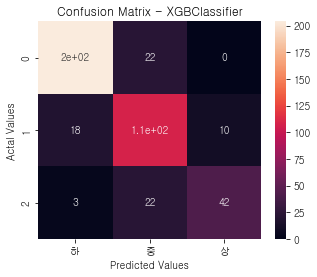

In [66]:
## XGBOOST 
from xgboost import XGBClassifier
mamm_xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4)
model_execution(mamm_xgb, "XGBClassifier", X_train_transformed, y_train, X_test_transformed, y_test)

In [ ]:
## CATBOOST
